In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
PATH = "gdrive/Shareddrives/Adv ML Project/Data/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv(PATH+'preprocessed_data.csv')
df = df[['CLASS', 'SPACY_PREPROCESSED']]
df = df.dropna()
# df['SPACY_PREPROCESSED'] = df['DESCRIPTION'].str.replace(r'<[^<>]*>', '', regex=True) # drop HTML tags
df['SPACY_PREPROCESSED'] = df['SPACY_PREPROCESSED'].str.replace(r'<[^<>]*>', '', regex=True) # drop HTML tags


from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['CLASS'])
df['LABEL'] = le.transform(df['CLASS'])
df.head()

display(df['CLASS'].value_counts())
df = df[['LABEL', 'CLASS', 'SPACY_PREPROCESSED']]

Energy Storage, Conversion, and Utilization    1223
Fission and Nuclear Technologies               1223
Fossil Fuels                                   1223
Renewable Energy Sources                       1223
Environmental Sciences                         1222
Name: CLASS, dtype: int64

In [ ]:
class_dict = df[['LABEL', 'CLASS']].drop_duplicates().reset_index()[['LABEL', 'CLASS']].to_dict()['CLASS']
label_dict = df[['LABEL', 'CLASS']].drop_duplicates().reset_index()[['LABEL', 'CLASS']].to_dict()['LABEL']

class_labels = {}
for idx, lab in class_dict.items():
    class_labels[label_dict[idx]] = lab

In [ ]:
class_dict

{0: 'Energy Storage, Conversion, and Utilization',
 1: 'Environmental Sciences',
 2: 'Fission and Nuclear Technologies',
 3: 'Fossil Fuels',
 4: 'Renewable Energy Sources'}

In [ ]:
from collections import Counter

for label in df['LABEL'].unique():
    words = df.loc[df['LABEL'] == label, 'SPACY_PREPROCESSED'].sum().split()
    word_freq = Counter(words)
    print(f'Label {label} has the following most frequent words:')
    for x in word_freq.most_common(10):
        a, _ = x
        print(a)

Label 0 has the following most frequent words:
energy
model
high
system
result
fuel
study
2
battery
base
Label 1 has the following most frequent words:
model
water
study
result
increase
change
high
cloud
climate
system
Label 2 has the following most frequent words:
fuel
reactor
waste
nuclear
system
result
high
model
study
temperature
Label 3 has the following most frequent words:
gas
catalyst
coal
high
plant
reaction
co
power
carbon
temperature
Label 4 has the following most frequent words:
wind
energy
system
power
high
temperature
result
model
water
geothermal


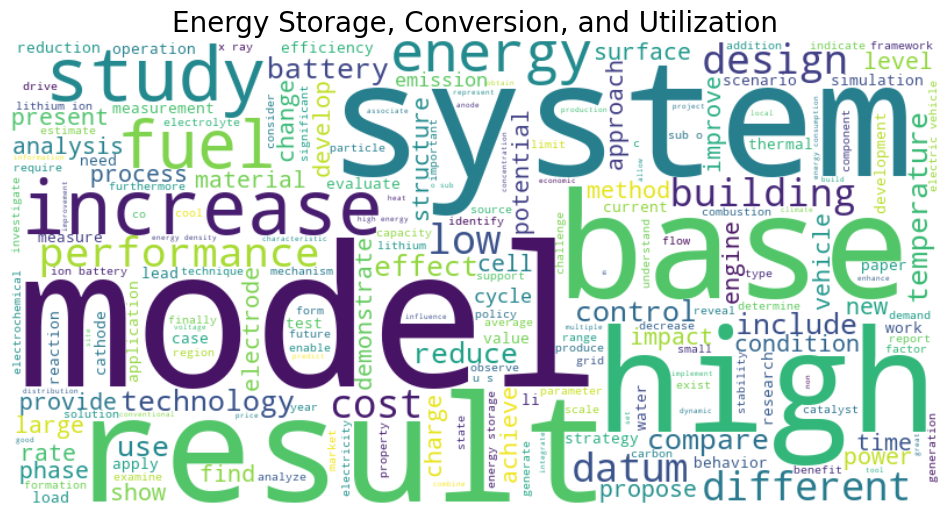

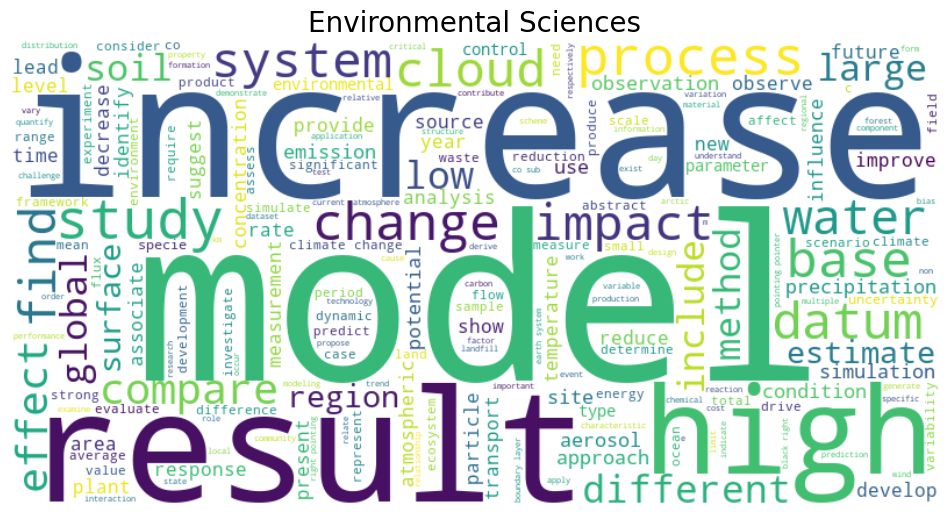

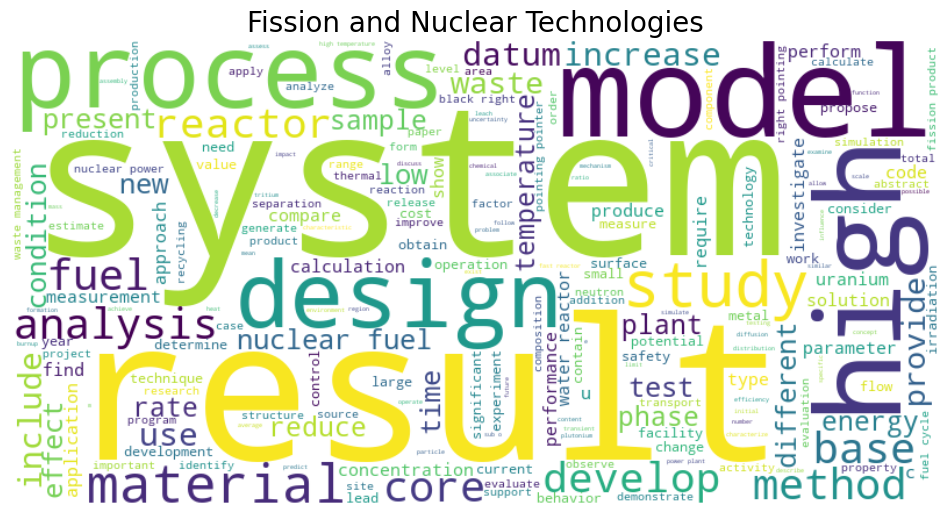

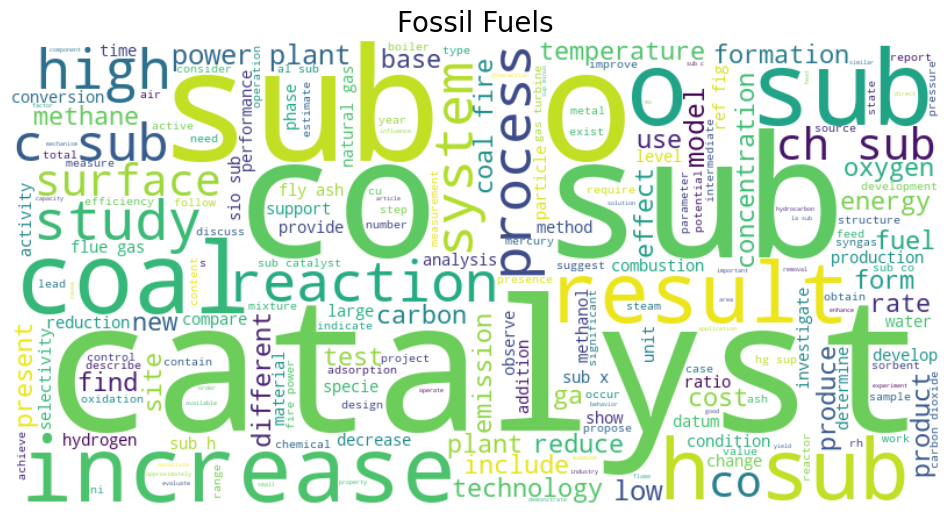

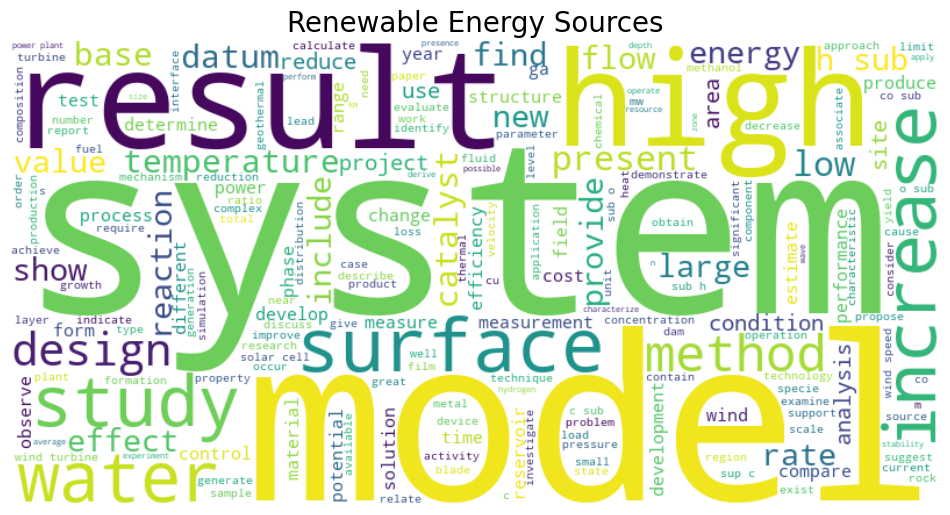

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in df['LABEL'].unique():
    words = df.loc[df['LABEL'] == label, 'SPACY_PREPROCESSED'].sum()
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{class_labels[label]}', fontsize=20)
    plt.show()

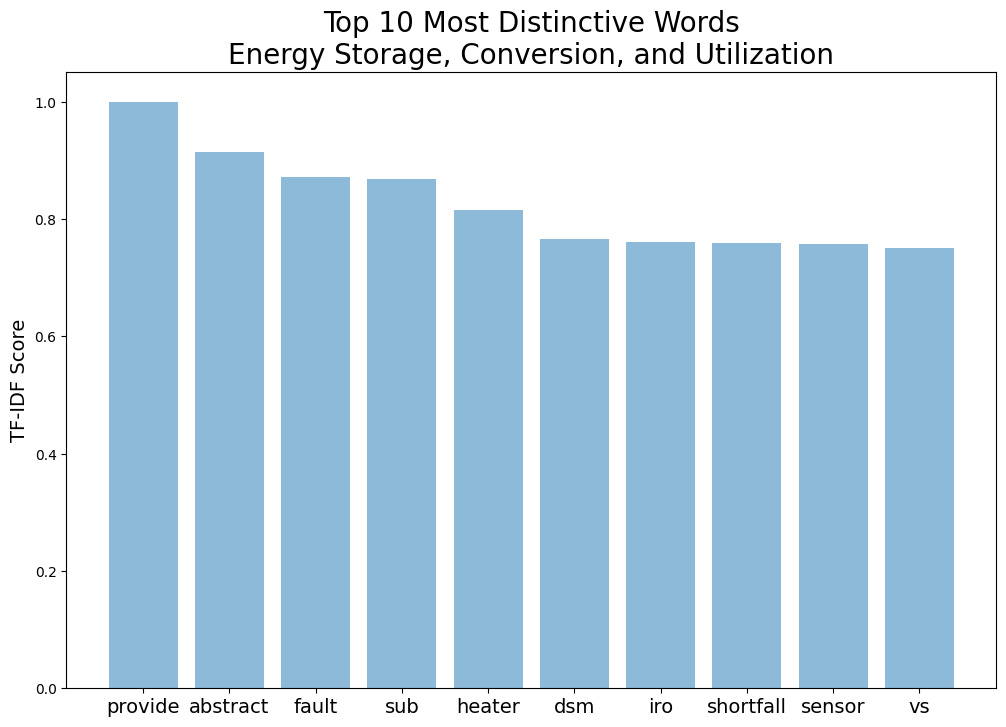

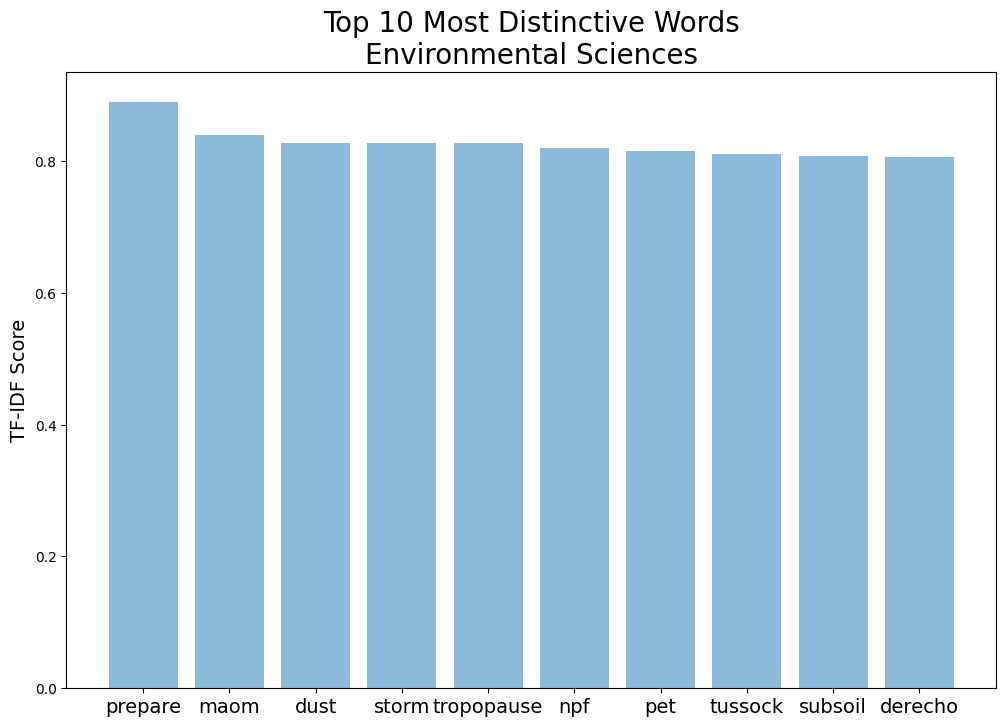

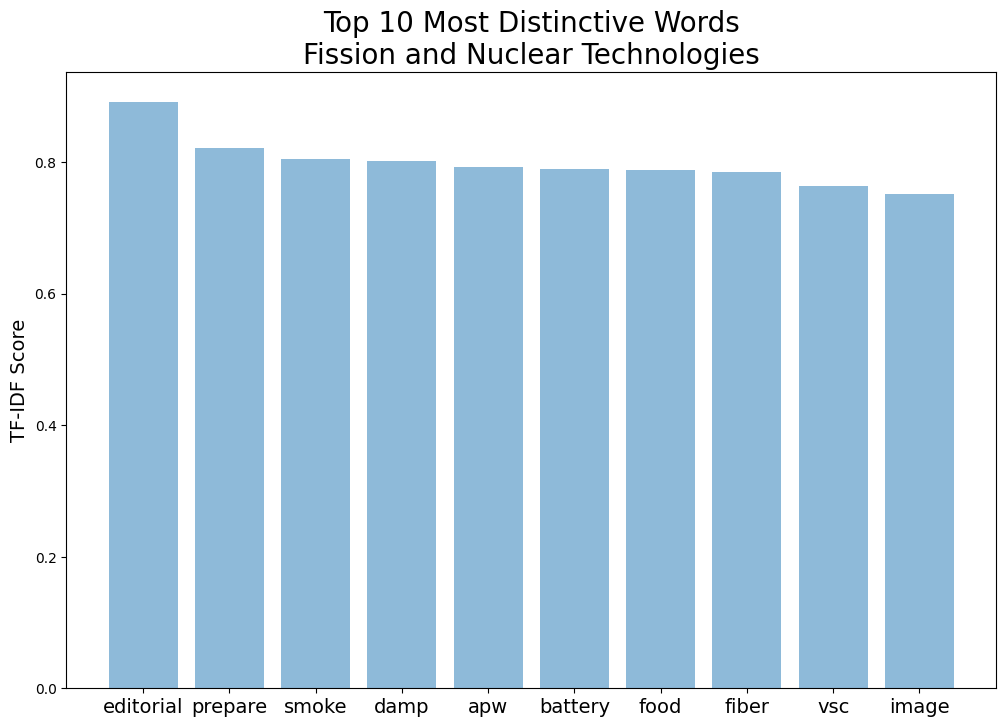

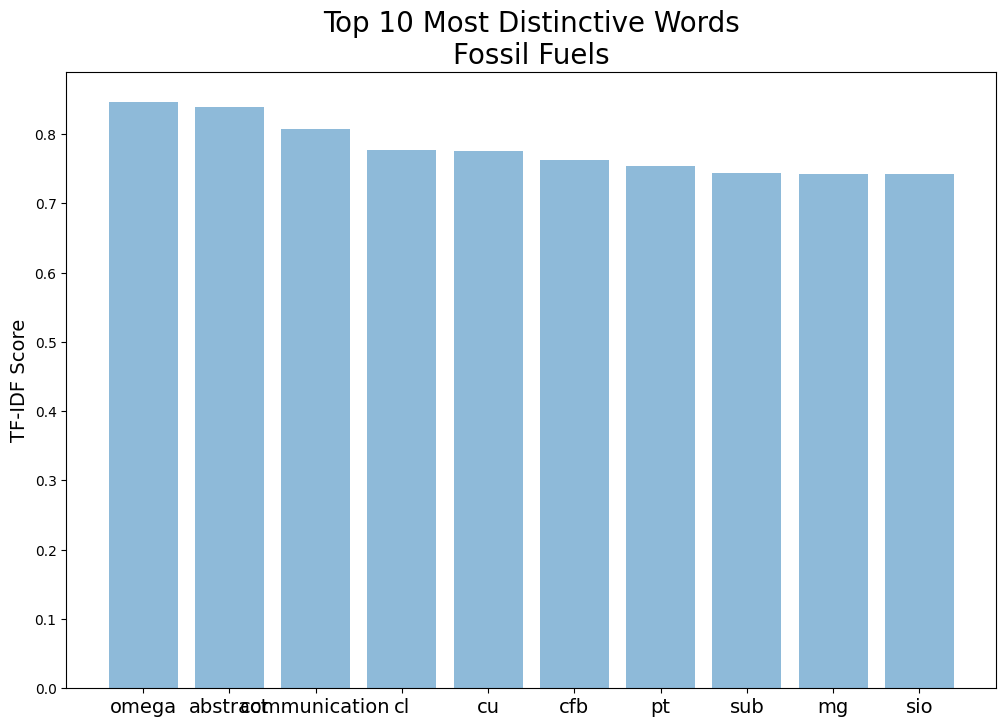

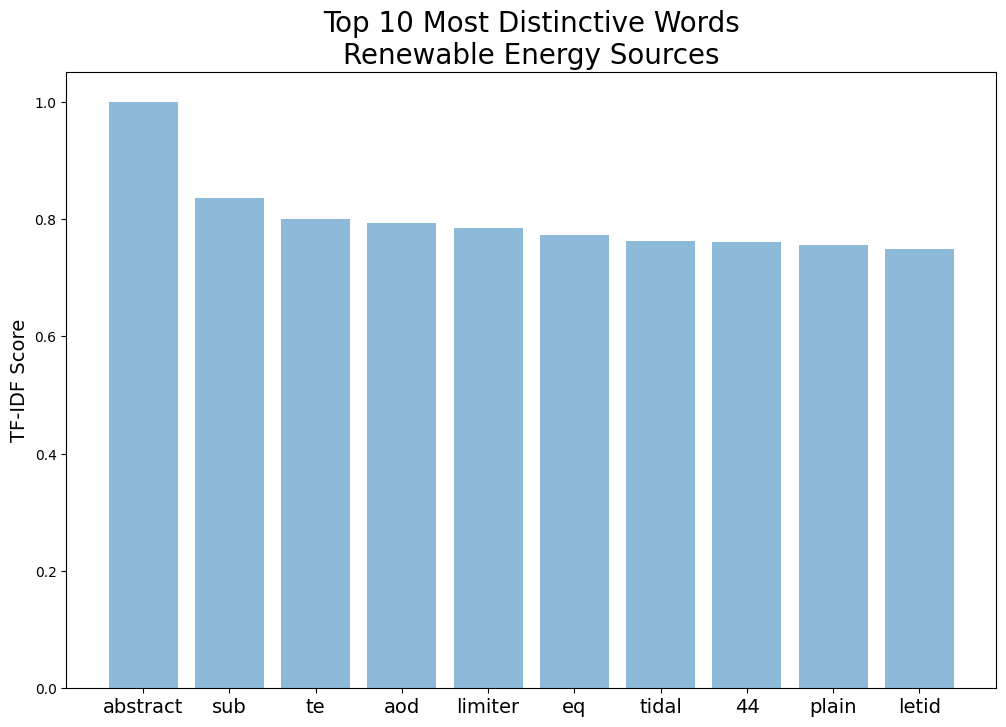

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

for label in df['LABEL'].unique():
    docs = df.loc[df['LABEL'] == label, 'SPACY_PREPROCESSED']
    tfidf = TfidfVectorizer()
    tfidf.fit(docs)
    count = CountVectorizer(vocabulary=tfidf.vocabulary_)
    count.fit(docs)
    label_tfidf = tfidf.transform(docs)
    max_tfidf = label_tfidf.max(axis=0).toarray()[0]
    sorted_tfidf_idx = max_tfidf.argsort()[::-1]
    top_n = 10
    feature_names = count.get_feature_names_out()
    top_features = [feature_names[i] for i in sorted_tfidf_idx[:top_n]]
    tfidf_scores = np.sort(max_tfidf)[::-1][:top_n]
    y_pos = np.arange(len(top_features))
    plt.figure(figsize=(12, 8))
    plt.bar(y_pos, tfidf_scores, align='center', alpha=0.5)
    plt.xticks(y_pos, top_features, fontsize=14)
    plt.ylabel('TF-IDF Score', fontsize=14)
    plt.title(f'Top {top_n} Most Distinctive Words\n{class_labels[label]}', fontsize=20)
    plt.show()


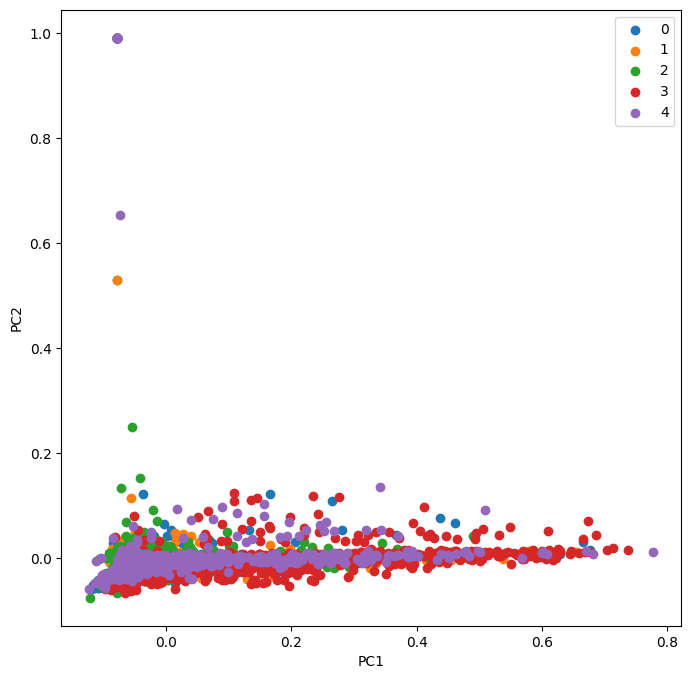

In [ ]:
from sklearn.decomposition import PCA
PCA
# Compute TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(df['SPACY_PREPROCESSED'])

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tfidf_features.toarray())

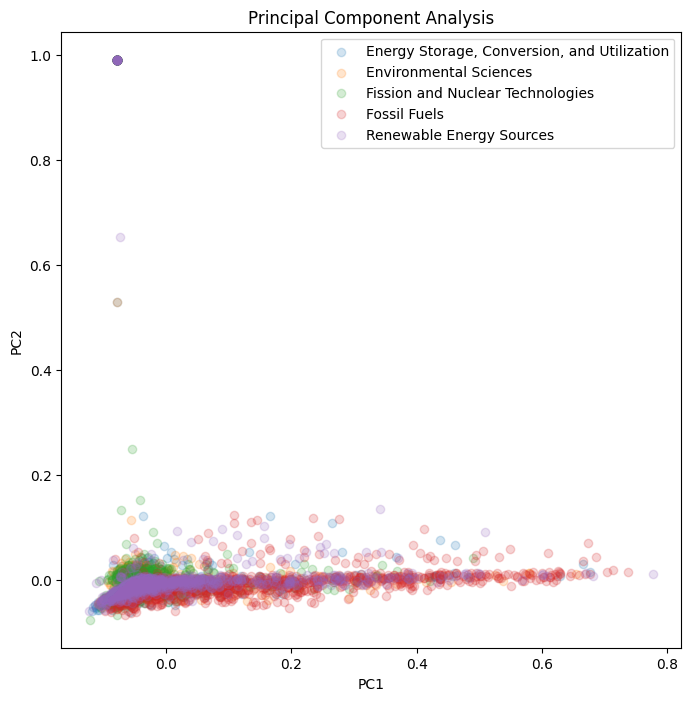

In [ ]:
# Create plot
plt.figure(figsize=(8,8))
for label in df['CLASS'].unique():
    plt.scatter(pca_features[df['CLASS'] == label, 0], pca_features[df['CLASS'] == label, 1], label=label, alpha=0.2)
plt.legend()
plt.title("Principal Component Analysis of TF-IDF Scores")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Compute bi-gram counts by label
vectorizer = CountVectorizer(ngram_range=(2,2))
bi_gram_counts = vectorizer.fit_transform(df['SPACY_PREPROCESSED'])
bi_gram_counts_df = pd.DataFrame(bi_gram_counts.toarray(), columns=vectorizer.get_feature_names_out())
bi_gram_counts_df['LABEL'] = df['LABEL']

# Compute most common bi-grams by label
most_common_bi_grams = {}
for label in df['LABEL'].unique():
  if label <= 4:
    continue
  label_df = bi_gram_counts_df[bi_gram_counts_df['LABEL'] == label]
  label_bi_gram_counts = label_df.iloc[:, :-1].sum(axis=0)
  print("--", label, "--")
  print(label_bi_gram_counts.sort_values(ascending=False)[:10])
  # most_common_bi_grams[label] = label_bi_gram_counts.sort_values(ascending=False)[:10]

# Print results
for label, bi_grams in most_common_bi_grams.items():
    print('Label {}:'.format(label))
    print(bi_grams)
    print()


-- 4 --
sub sub             264
co sub              154
solar cell          152
wind turbine        146
wind speed           92
power plant          86
wind farm            76
ref fig              76
high temperature     67
sub co               66
dtype: int64
